# Liquid/liquid equilibrium : ternary diagram and extraction

The code allow to create the ternary diagram (in weight %) for the isopropyl ether (diluant D), acetic acid (solute A) and water (solvent S). It plots the binodal curve and the tie lines (conodales in French). It allows to give the answers to the following questions :

One want to realize the extraction of the acid from a solution of 4 kg of isopropyl ether and 1 kg of acetic acid with 3 kg of water. 
a) Determine from the equilibrium the partition coefficient (with a linear regression of the mass ratio in the concentration range used during the extraction)

It is then possible to calculate the extraction for a given mixture  i.e. the composition and the weight of the extract and the rafinate phases. 

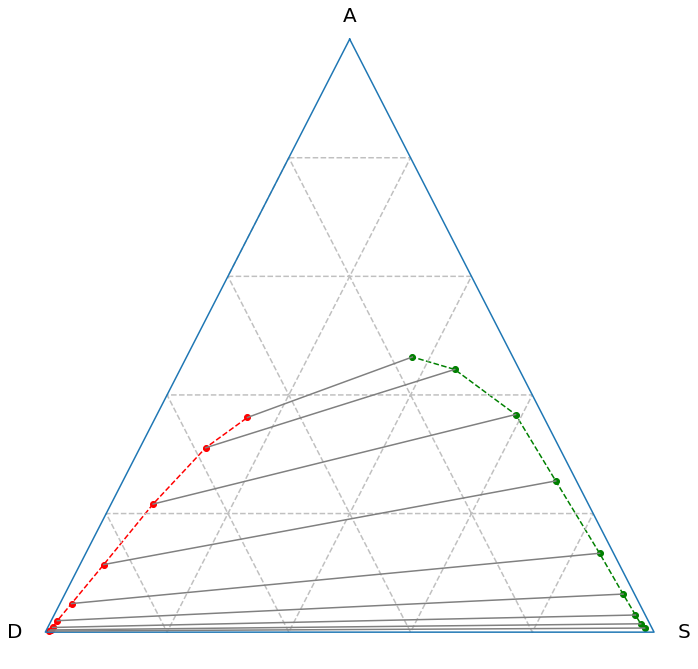

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#S for solvent, A for solute and D for diluant
#SP for solvent phase DP for diluant phase
# Equilibrium data 
xA_SP=np.array([0.69,  1.41,2.89,6.42,13.3,25.5,36.7,44.3,46.4])
xS_SP=np.array([98.1 , 97.1,95.5,91.7,84.4,71.1,58.9,45.1,37.1])
xA_DP=np.array([0.18,  0.37,0.79,1.93,4.82,11.4,21.6,31.1,36.2])
xS_DP=np.array([0.5,0.7,0.8,1,1.9,3.9,6.9,10.8,15.1])

#functions to change the coordinate from x,y plot to a ternary diagram
def tri(xA,xS):
    X=xS+xA/2
    Y=xA*np.sqrt(3)/2
    return X,Y
def detri(X,Y):
    xA=Y*2/np.sqrt(3)
    xS=X-xA/2
    return xA,xS
#calcul of the position of data point in the x,y plot
XSP,YSP=tri(xA_SP,xS_SP)
XDP,YDP=tri(xA_DP,xS_DP)
#plot of ternary diagram
def ter_diag():
    #Coordinates of based line
    xA_line=np.array([100,  0,0,100])
    xS_line=np.array([0,100,0,0])
    #Coordinates of intermediate line
    xA_uline=np.array([80, 80, 0,20,20, 0,80,60,60,0,40,40,0,60])
    xS_uline=np.array([0,  20,20,0 ,80,80, 0,0,40,40,0,60,60,0])
    #plot
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=1)
    fig, ax = plt.subplots(figsize = (12, 12))   
    plt.plot(XSP,YSP,color='green', marker='o', linestyle='dashed')
    plt.plot(XDP,YDP,color='red', marker='o', linestyle='dashed')
    X,Y=tri(xA_uline,xS_uline)
    plt.plot(X,Y,'--', color='silver')
    X,Y=tri(xA_line,xS_line)
    plt.plot(X,Y)
    for i in range(len(xA_SP)):
        X=np.array([XSP[i],XDP[i]])
        Y=np.array([YSP[i],YDP[i]])
        plt.plot(X,Y, color='grey')
    ax.axis("off")
    plt.text(-5, 0, "D", ha="center", va="center", size=20, bbox=bbox_props)
    plt.text(105, 0, "S", ha="center", va="center", size=20, bbox=bbox_props)
    plt.text(50, 90, "A", ha="center", va="center", size=20, bbox=bbox_props)
    return

ter_diag()
plt.show()

### a) Determination of the partition coefficient

The determination of the partition coefficient is based on the assumption of 
- non miscible solvent (Assumption 1) : there is no ether in aqueous phase and no water in ether phase
- the distribution curve Y=f(X) is linear

The distribution curve is not really lienar on the whole concentration range. The linear regression is then done on the concentration range that will be used in the experiments (i.e. a mass ratio X less than 0.25). There is 9 points on the distribution curve only the 5 first are used for the regression.


[0.00181232 0.00374002 0.00802764 0.01988256 0.05167238 0.13459268
 0.3020979  0.53528399 0.74332649] [0.00703364 0.01452111 0.03026178 0.07001091 0.15758294 0.35864979
 0.62308998 0.98226164 1.25067385]


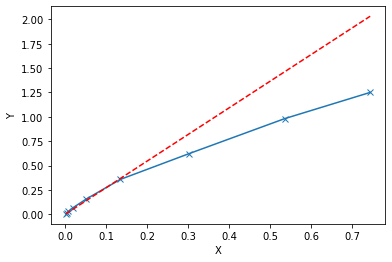

The partition coefficient for the whole concentration range is, K= 2.7333084919200994


In [4]:
#calculation of mass ratio
Y=xA_SP/xS_SP
X=xA_DP/(100-xS_DP-xA_DP)
#plot the distribution curve
print(X, Y)
plt.plot(X,Y, marker='x')
plt.xlabel('X')
plt.ylabel('Y')

#regression lineaire 
def fit(x,m):
    return m*x
from scipy.optimize import curve_fit
m,p=curve_fit(fit, X[:6], Y[:6])
K=m[0]
plt.plot(X, fit (X,K), 'r--')
plt.show()
print ('The partition coefficient for the whole concentration range is, K=', K)

## b) Calcul des courants croisés 1 puis 3 étages avec le coefficient de partage

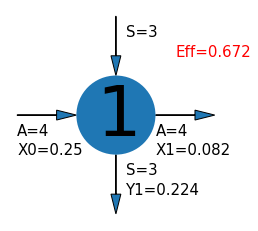

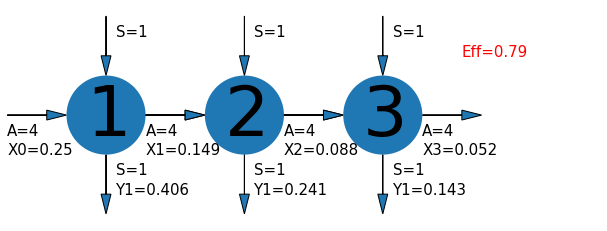

In [5]:
#Calculation for one stage
m_A=1
m_D=4
m_S=3
X0=m_A/m_D
A=m_D
S=m_S

#Calculation of the Y1 and X1
X11=(A/(A+(K*S)))*X0
Y11=K*X11
eff=(X0-X11)/X0

#Fonction pour tracer les étages (cercle, flèche, resultats)
def etage(xc,yc,rc,label,X1,Y1,S):
    circ=plt.Circle(( xc , yc ), rc )
    hl=0.1
    la=0.5-rc-hl
    plt.text(xc-0.1,yc-0.1,label, size=70)
    plt.arrow(xc-0.5,yc,la,0.,head_width=0.05, head_length=hl)
    plt.arrow(xc+rc,yc,la,0.,head_width=0.05, head_length=hl)
    plt.arrow(xc,1,0.,-la,head_width=0.05, head_length=hl)
    plt.arrow(xc,0.3,0.,-la,head_width=0.05, head_length=hl)
    plt.text(xc+rc,0.4,'A='+str(A), size=15)
    plt.text(xc+rc,0.3,'X'+label+'='+str(round(X1,3)), size=15)
    plt.text(xc+0.05,0.9,'S='+str(S), size=15)
    plt.text(xc+0.05,0.2,'S='+str(S), size=15)
    plt.text(xc+0.05,0.1,'Y1='+str(round(Y1,3)), size=15)
    ax.add_patch(circ)

#Tracé du flowsheet pour 1 étage
fig, ax = plt.subplots(figsize=(4, 4))
etage(0.5,0.5,0.2,'1',X11,Y11,S)
plt.text(0,0.4,'A='+str(A), size=15)
plt.text(0,0.3,'X0='+str(X0), size=15)
plt.text(0.8,0.8,'Eff='+str(round(eff,3)), size=15, c='r')
ax.set_aspect( 1 )
plt.axis('off')
plt.show()

#Calculation for 3 stages with S/3
S=1
coeff=(A/(A+(K*S)))
X1=coeff*X0
Y1=K*X1
X2=coeff*X1
Y2=K*X2
X3=coeff*X2
Y3=K*X3
eff=(X0-X3)/X0

#Tracé du flowsheet pour 3 étages
fig, ax = plt.subplots(figsize=(12, 4))
etage(0.5,0.5,0.2,'1',X1,Y1,S)
etage(1.2,0.5,0.2,'2',X2,Y2,S)
etage(1.9,0.5,0.2,'3',X3,Y3,S)
plt.text(0,0.4,'A='+str(A), size=15)
plt.text(0,0.3,'X0='+str(X0), size=15)
plt.text(2.3,0.8,'Eff='+str(round(eff,3)), size=15, c='r')
ax.set_xlim([0, 3])
ax.set_aspect( 1 )
plt.axis('off')
plt.show()

### d) Construction graphique (avec l'hypothèse d'un coeff de partition)

La construction graphique permet de représenter les résultats d'une autre façon. Elle est très utilisée dans le cas où les calculs deviennent compliqués comme par exemple dans le cas des configurations à contre-courant que vous verrez en master.

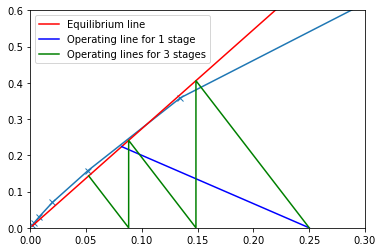

In [6]:
plt.plot(X,Y, marker='x')
plt.plot(X,K*X,'r',label='Equilibrium line')
plt.plot([X11,X0],[Y11,0],'b',label='Operating line for 1 stage')
plt.plot([X3,X2,X2,X1,X1,X0],[Y3,0,Y2,0,Y1,0],'g',label='Operating lines for 3 stages')
plt.xlim(0,0.3)
plt.ylim(0,0.6)
plt.legend()
plt.show()

e) Pour n étages avec la même quantité de solvant par étage, S, on peut démontrer que :

$$\frac{X_n}{X_0}=(\frac{A}{A+KS})^n$$

ou 

$$n=\frac{ln(\frac{X_n}{X_0})}{ln(\frac{A}{A+KS})}$$


f) Combien d’étages faudrait-il utiliser pour atteindre un rendement d’extraction de 85%, dans le cas où la quantité totale, $S_{tot} de solvant est toujours de 3 kg : chaque étage est alimenté par 3/n kg de solvent

>Si on connaît le rendement d'extraction on peut déterminer la quantité présente dans le raffinat, Xn, en réalisant un bilan matière sur l'acide sur l'ensemble des n étages. La quantité totale extraite, $\sum_{i=1}^{n} S_i Y_i$ est en effet égale à la quantité d'acide perdue dans le raffinat, $A(X_0-X_n)$.
>
>Le rendement d'extraction peut donc s'écrire en fonction de la quantité dans le raffinat au bout de n étages :
>
>$$\eta=\frac{\sum_{i=1}^{n} S_i Y_i}{A X_n}=\frac{A(X_0-X_n)}{A X_n}$$
>
>Soit : $X_n=X_0(1-\eta)$

>Pour connaître le nombre d'étage n, il faut résoudre l'équation suivante :
>$$\frac{X_n}{X_0}=(\frac{A}{A+KS_{tot}/n})^n$$
>Il faut donc passer par une méthode numérique pour résoudre cette équation et trouver n


g) Combien de solvant faudrait-il utiliser pour atteindre un rendement d’extraction de 85% en conservant trois étages

> Il faut résoudre l'équation suivante :
>$$\frac{X_n}{X_0}=(\frac{A}{A+KS_{tot}/3})^3$$
>soit:
>$$S_{tot}/3=\frac{A}{K}(\frac{X_n}{X_0}^{(-1/3)}-1)$$



In [10]:
from scipy.optimize import newton

eff=0.85
Xn=X0*(1-eff)
#function to solve to find n with 3/n kg of solvent per stage
def f1(n):
    coeff=(A/(A+(K*3/n)))
    out=n*np.log(coeff)-np.log(Xn/X0)
    return out

x=newton(f1, x0=1)
print ('To reach an efficiency of ', eff, ' we need', round(x,2), 'cross current stages with',round(3/x,2), 'kg of solvent per stages')

S=3*A/K*(((Xn/X0)**(-1/3))-1)
print ('To reach an efficiency of ', eff, ' we need', round(S,2), 'kg of solvent for the 3 stages :',round(S/3,2), 'kg of solvent per stages')


To reach an efficiency of  0.85  we need 12.4 cross current stages with 0.24 kg of solvent per stages
To reach an efficiency of  0.85  we need 3.87 kg of solvent for the 3 stages : 1.29 kg of solvent per stages


### Calcul extraction 1 étage avec le diagramme ternaire
Ce type de calcul est le plus précis et ne comporte pas d hypothèses majeures (en dehors du fait qu'on considère être à l'équilibre à la sortie d'un étage théorique) 

In [ ]:
m_A=1
m_D=4
m_S=3
m_M=m_A+m_D+m_S
XA_M=100*m_A/m_M
XS_M=100*m_S/m_M
#plot ternary diagram
ter_diag()
#plot the points and the line between the feed, the mixture 1 and the solvent
X_F,Y_F=tri(100*m_A/(m_D+m_A),0)
X_M,Y_M=tri(XA_M,XS_M)
X_S,Y_S=tri(0.,100.)
plt.scatter(X_F,Y_F, color='blue', marker='x')
plt.plot([X_F,X_S],[Y_F,Y_S], color='blue', marker='x')

#plot the mixture point
X_M,Y_M=tri(XA_M,XS_M)
plt.scatter(X_M,Y_M, color='red', marker='x')
#find the two tie lines bordering the mixture 
c1=0
c2=0
for i in range(len(xA_SP)):
    if Y_M < YDP[i]+(YSP[i]-YDP[i])*(X_M-XDP[i])/(XSP[i]-XDP[i]):
        c1=i-1
        c2=i
        print ('There will be 2 phases and the mixure is located between the tie lines', c1,'and',c2)
        break
if c2==0 : print ('There is only one phase : the separation is impossible')

#determination of the tie line for the mixture 

#function to find the intersection point between two lines AB and CD
def intersec(xA,yA,xB,yB,xC,yC,xD,yD):
    #slope of line A B
    AB=(yB-yA)/(xB-xA)
    #slope of line A B
    CD=(yD-yC)/(xD-xC)
    x=-(CD*xC-yC-AB*xA+yA)/(AB-CD)
    y=AB*(x-xA)+yA
    return x,y

#find the intersection point I between the two bordering tie line
X_I,Y_I=intersec(XDP[c1],YDP[c1],XSP[c1],YSP[c1],XDP[c2],YDP[c2],XSP[c2],YSP[c2])
#find the intersection point between IM and the binodal curve (diluant side)
X_DC,Y_DC=intersec(X_I,Y_I,X_M,Y_M,XDP[c2],YDP[c2],XDP[c1],YDP[c1])
#find the intersection point between IM and the binodal curve (solvant side)
X_SC,Y_SC=intersec(X_I,Y_I,X_M,Y_M,XSP[c2],YSP[c2],XSP[c1],YSP[c1])
plt.scatter(X_DC,Y_DC, color='red', marker='x')
plt.scatter(X_SC,Y_SC, color='red', marker='x')
plt.plot([X_SC,X_DC],[Y_SC,Y_DC], color='red', marker='x')
plt.show()



### Calculation of the composition of the phases and their weight.


In [ ]:
print ('The composition of the raffinate phase, R, is :')
xA,xS=detri(X_DC,Y_DC)
print ('x_A=', round(xA,2),'% x_S=', round(xS,2),'% x_D=', round(100-xS-xA,2),'%')
print ('X_1=', round(xA/(100-xS-xA),2))
print ('The composition of the extract phase, E, is :')
yA,yS=detri(X_SC,Y_SC)
print ('y_A=', round(yA,2),'% y_S=', round(yS,2),'% y_D=', round(100-yS-yA,2),'%')
print ('Y_1=', round(yA/yS,2))
m_E=m_M*(XA_M-xA)/(yA-xA)
m_R=m_M-m_E
print ('The mass of extract is :', round(m_E,2), 'kg and the mass of raffinate is : ', round(m_R,2), 'kg ')
print("")
print('The efficiency is ', round(m_E*yA/m_A,2), '%')
print('The efficiency is ', round(100*(m_A-m_R*xA/100)/m_A,2), '%')

### Calcul extraction 3 étages avec le diagramme ternaire

In [ ]:
m_A=1
m_D=4
m_S1=1
m_S2=1
m_S3=1
m_M1=m_A+m_D+m_S1
XA_M1=100*m_A/m_M1
XS_M1=100*m_S1/m_M1
#plot ternary diagram
ter_diag()
#plot the points and the line between the feed, the mixture 1 and the solvent
X_F,Y_F=tri(100*m_A/(m_D+m_A),0)
X_M1,Y_M1=tri(XA_M1,XS_M1)
X_S,Y_S=tri(0.,100.)
plt.scatter(X_F,Y_F, color='blue', marker='x')
plt.plot([X_F,X_S],[Y_F,Y_S], color='blue', marker='x')

#plot the mixture point
plt.scatter(X_M1,Y_M1, color='red', marker='x')
#find the two tie lines bordering the mixture 
c1=0
c2=0
for i in range(len(xA_SP)):
    if Y_M < YDP[i]+(YSP[i]-YDP[i])*(X_M-XDP[i])/(XSP[i]-XDP[i]):
        c1=i-1
        c2=i
        print ('There will be 2 phases and the mixure is located between the tie lines', c1,'and',c2)
        break
if c2==0 : print ('There is only one phase : the separation is impossible')

#determination of the tie line for the mixture 

#function to find the intersection point between two lines AB and CD
def intersec(xA,yA,xB,yB,xC,yC,xD,yD):
    #slope of line A B
    AB=(yB-yA)/(xB-xA)
    #slope of line A B
    CD=(yD-yC)/(xD-xC)
    x=-(CD*xC-yC-AB*xA+yA)/(AB-CD)
    y=AB*(x-xA)+yA
    return x,y

#find the intersection point I between the two bordering tie line
X_I,Y_I=intersec(XDP[c1],YDP[c1],XSP[c1],YSP[c1],XDP[c2],YDP[c2],XSP[c2],YSP[c2])
#find the intersection point between IM and the binodal curve (diluant side)
X_DC1,Y_DC1=intersec(X_I,Y_I,X_M1,Y_M1,XDP[c2],YDP[c2],XDP[c1],YDP[c1])
#find the intersection point between IM and the binodal curve (solvant side)
X_SC1,Y_SC1=intersec(X_I,Y_I,X_M1,Y_M1,XSP[c2],YSP[c2],XSP[c1],YSP[c1])
plt.plot([X_SC1,X_DC1],[Y_SC1,Y_DC1], color='red', marker='x')

print ('The composition of the raffinate phase, R1, is :')
xA1,xS1=detri(X_DC1,Y_DC1)
print ('x_A=', round(xA1,2),'% x_S=', round(xS1,2),'% x_D=', round(100-xS1-xA1,2),'%')
print ('The composition of the extract phase, E1, is :')
yA1,yS1=detri(X_SC1,Y_SC1)
print ('y_A=', round(yA1,2),'% y_S=', round(yS1,2),'% y_D=', round(100-yS1-yA1,2),'%')
m_E1=m_M1*(XA_M1-xA1)/(yA1-xA1)
m_R1=m_M1-m_E1
print ('The mass of extract is :', round(m_E1,2), 'g and the mass of raffinate is : ', round(m_R1,2), 'g ')
print ('')
plt.scatter(X_DC1,Y_DC1, color='red', marker='x')
plt.scatter(X_SC1,Y_SC1, color='red', marker='x')
plt.plot([X_SC1,X_DC1],[Y_SC1,Y_DC1], color='red', marker='x')

#STAGE 2
#calculation of mass fraction
m_M2=m_R1+m_S2
XA_F2=xA1
XA_M2=xA1*m_R1/m_M2
XS_M2=(xS1*m_R1+100* m_S2)/m_M2

#plot the points and the line between the feed, the mixture 1 and the solvent
X_F2,Y_F2=tri(xA1,xS1)
X_M2,Y_M2=tri(XA_M2,XS_M2)
X_S,Y_S=tri(0.,100.)
plt.scatter(X_M2,Y_M2, color='red', marker='x')
plt.scatter(X_F2,Y_F2, color='blue', marker='x')
plt.plot([X_F2,X_S],[Y_F2,Y_S], color='blue', marker='x')

#find the two tie lines bordering the mixture 
c1=0
c2=0
for i in range(len(xA_SP)):
    if Y_M2 < YDP[i]+(YSP[i]-YDP[i])*(X_M2-XDP[i])/(XSP[i]-XDP[i]):
        c1=i-1
        c2=i
        print ('The mixture 2 will lead to 2 phases and the mixure is located between the tie lines', c1,'and',c2)
        break
if c2==0 : print ('There is only one phase : the separation is impossible')

#find the intersection point I between the two bordering tie line
X_I,Y_I=intersec(XDP[c1],YDP[c1],XSP[c1],YSP[c1],XDP[c2],YDP[c2],XSP[c2],YSP[c2])
#find the intersection point between IM and the binodal curve (diluant side)
X_DC2,Y_DC2=intersec(X_I,Y_I,X_M2,Y_M2,XDP[c2],YDP[c2],XDP[c1],YDP[c1])
#find the intersection point between IM and the binodal curve (solvant side)
X_SC2,Y_SC2=intersec(X_I,Y_I,X_M2,Y_M2,XSP[c2],YSP[c2],XSP[c1],YSP[c1])


print ('The composition of the raffinate phase, R2, is :')
xA2,xS2=detri(X_DC2,Y_DC2)
print ('x_A=', round(xA2,2),'% x_S=', round(xS2,2),'% x_D=', round(100-xS2-xA2,2),'%')
print ('The composition of the extract phase, E2, is :')
yA2,yS2=detri(X_SC2,Y_SC2)
print ('y_A=', round(yA2,2),'% y_S=', round(yS2,2),'% y_D=', round(100-yS2-yA2,2),'%')
m_E2=m_M2*(XA_M2-xA2)/(yA2-xA2)
m_R2=m_M2-m_E2
print ('The mass of extract is :', round(m_E2,2), 'g and the mass of raffinate is : ', round(m_R2,2), 'g ')
print ('')
plt.scatter(X_DC2,Y_DC2, color='red', marker='x')
plt.scatter(X_SC2,Y_SC2, color='red', marker='x')
plt.plot([X_SC2,X_DC2],[Y_SC2,Y_DC2], color='red', marker='x')

#STAGE 3
#calculation of mass fraction
m_M3=m_R2+m_S3
XA_F3=xA2
XA_M3=xA2*m_R2/m_M3
XS_M3=(xS2*m_R2+100* m_S3)/m_M3

#plot the points and the line between the feed, the mixture 1 and the solvent
X_F3,Y_F3=tri(xA2,xS2)
X_M3,Y_M3=tri(XA_M3,XS_M3)
X_S,Y_S=tri(0.,100.)
plt.scatter(X_M3,Y_M3, color='red', marker='x')
plt.scatter(X_F3,Y_F3, color='blue', marker='x')
plt.plot([X_F3,X_S],[Y_F3,Y_S], color='blue', marker='x')

#find the two tie lines bordering the mixture 
c1=0
c2=0
for i in range(len(xA_SP)):
    if Y_M2 < YDP[i]+(YSP[i]-YDP[i])*(X_M2-XDP[i])/(XSP[i]-XDP[i]):
        c1=i-1
        c2=i
        print ('The mixture 2 will lead to 2 phases and the mixure is located between the tie lines', c1,'and',c2)
        break
if c2==0 : print ('There is only one phase : the separation is impossible')

#find the intersection point I between the two bordering tie line
X_I,Y_I=intersec(XDP[c1],YDP[c1],XSP[c1],YSP[c1],XDP[c2],YDP[c2],XSP[c2],YSP[c2])
#find the intersection point between IM and the binodal curve (diluant side)
X_DC3,Y_DC3=intersec(X_I,Y_I,X_M3,Y_M3,XDP[c2],YDP[c2],XDP[c1],YDP[c1])
#find the intersection point between IM and the binodal curve (solvant side)
X_SC3,Y_SC3=intersec(X_I,Y_I,X_M3,Y_M3,XSP[c2],YSP[c2],XSP[c1],YSP[c1])


print ('The composition of the raffinate phase, R3, is :')
xA3,xS3=detri(X_DC3,Y_DC3)
print ('x_A=', round(xA3,2),'% x_S=', round(xS3,2),'% x_D=', round(100-xS3-xA3,2),'%')
print ('The composition of the extract phase, E3, is :')
yA3,yS3=detri(X_SC3,Y_SC3)
print ('y_A=', round(yA3,2),'% y_S=', round(yS3,2),'% y_D=', round(100-yS3-yA3,2),'%')
m_E3=m_M3*(XA_M3-xA3)/(yA3-xA3)
m_R3=m_M3-m_E3
print ('The mass of extract is :', round(m_E3,2), 'g and the mass of raffinate is : ', round(m_R3,2), 'g ')
print ("")
print('The efficiency is ', round((m_E1*yA1+m_E2*yA2+m_E3*yA3)/m_A,2))
print('The efficiency is ', round(100*(m_A-m_R3*xA3/100)/m_A,2), '%')

plt.scatter(X_DC3,Y_DC3, color='red', marker='x')
plt.scatter(X_SC3,Y_SC3, color='red', marker='x')
plt.plot([X_SC3,X_DC3],[Y_SC3,Y_DC3], color='red', marker='x')

plt.show()